<a href="https://colab.research.google.com/github/NikuDubenco/DS-Unit-2-Regression-1/blob/master/Nicolae_Dubenco_making_forecast_lesson.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab  import files
files.upload()

Saving altdata_wiki-20170306-20190524.csv to altdata_wiki-20170306-20190524.csv


{u'altdata_wiki-20170306-20190524.csv': 'Date,"Alternative data (finance)"\n2017-03-06,54\n2017-03-07,18\n2017-03-08,12\n2017-03-09,21\n2017-03-10,15\n2017-03-11,4\n2017-03-12,1\n2017-03-13,4\n2017-03-14,4\n2017-03-15,3\n2017-03-16,6\n2017-03-17,7\n2017-03-18,2\n2017-03-19,2\n2017-03-20,1\n2017-03-21,9\n2017-03-22,1\n2017-03-23,3\n2017-03-24,0\n2017-03-25,3\n2017-03-26,0\n2017-03-27,0\n2017-03-28,5\n2017-03-29,5\n2017-03-30,7\n2017-03-31,27\n2017-04-01,3\n2017-04-02,3\n2017-04-03,4\n2017-04-04,15\n2017-04-05,4\n2017-04-06,3\n2017-04-07,10\n2017-04-08,4\n2017-04-09,6\n2017-04-10,4\n2017-04-11,9\n2017-04-12,9\n2017-04-13,15\n2017-04-14,5\n2017-04-15,6\n2017-04-16,0\n2017-04-17,1\n2017-04-18,7\n2017-04-19,6\n2017-04-20,4\n2017-04-21,3\n2017-04-22,0\n2017-04-23,3\n2017-04-24,3\n2017-04-25,1\n2017-04-26,1\n2017-04-27,0\n2017-04-28,3\n2017-04-29,7\n2017-04-30,1\n2017-05-01,3\n2017-05-02,4\n2017-05-03,3\n2017-05-04,0\n2017-05-05,8\n2017-05-06,1\n2017-05-07,4\n2017-05-08,0\n2017-05-09,3\n2017-

In [2]:
import pandas as pd
df = pd.read_csv('altdata_wiki-20170306-20190524.csv')
df.shape

(810, 2)

In [3]:
df.head()

,Date,Alternative data (finance)
0,2017-03-06,54
1,2017-03-07,18
2,2017-03-08,12
3,2017-03-09,21
4,2017-03-10,15


In [4]:
df.tail()

,Date,Alternative data (finance)
805,2019-05-20,51
806,2019-05-21,60
807,2019-05-22,80
808,2019-05-23,76
809,2019-05-24,52


In [0]:
df['Date'] = pd.to_datetime(df['Date'])
df = df.set_index('Date')

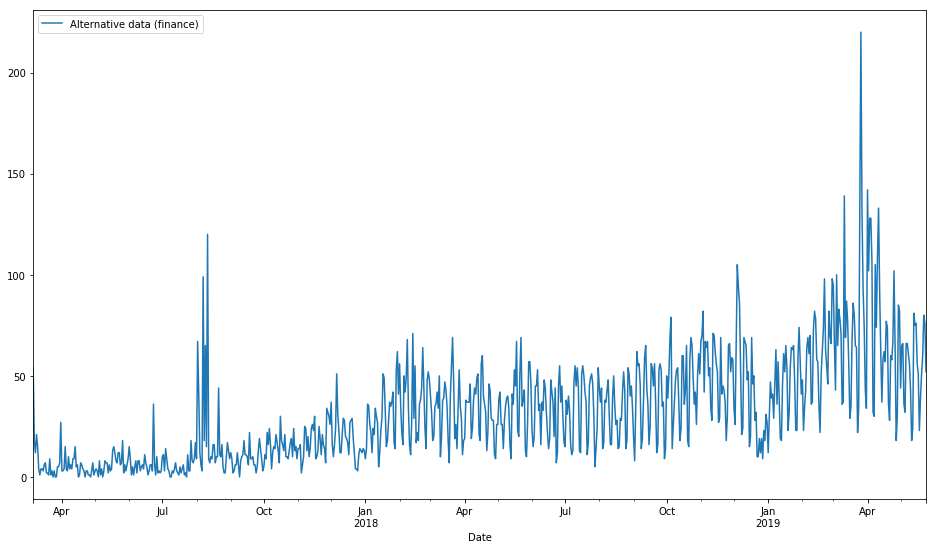

In [6]:
df.plot(figsize=(16,9));

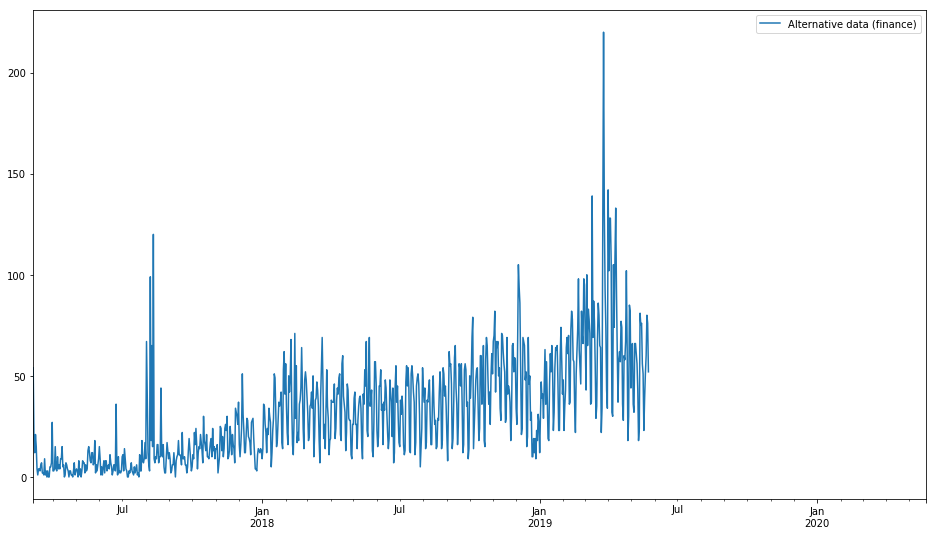

In [7]:
df = df.reindex(pd.date_range(start='2017-03-06', end='2020-05-23'))
df.plot(figsize=(16,9));

In [8]:
df['Alternative data (finance)'].mean()

31.841975308641974

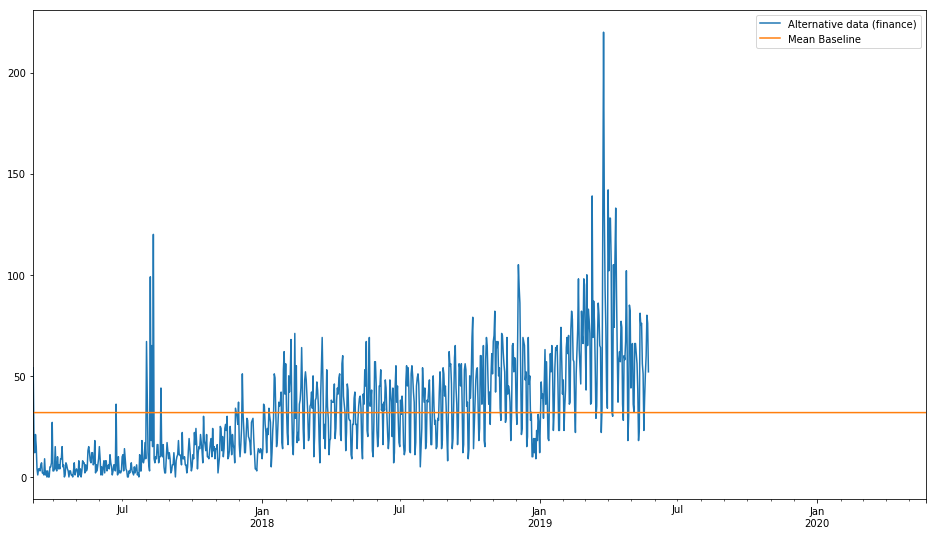

In [9]:
df['Mean Baseline'] = df['Alternative data (finance)'].mean()
df.plot(figsize=(16,9));

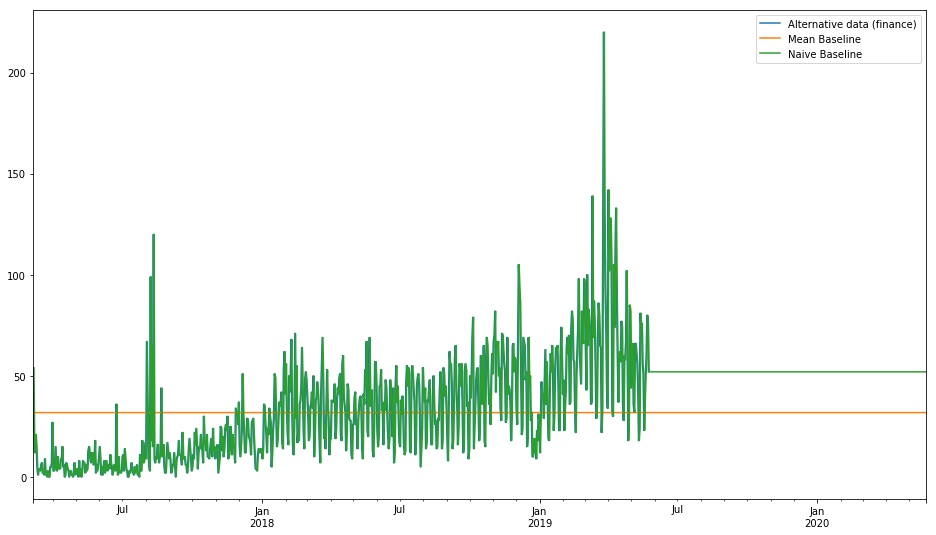

In [10]:
df['Naive Baseline'] = df['Alternative data (finance)'].shift(1).ffill()
df.plot(figsize=(16,9));

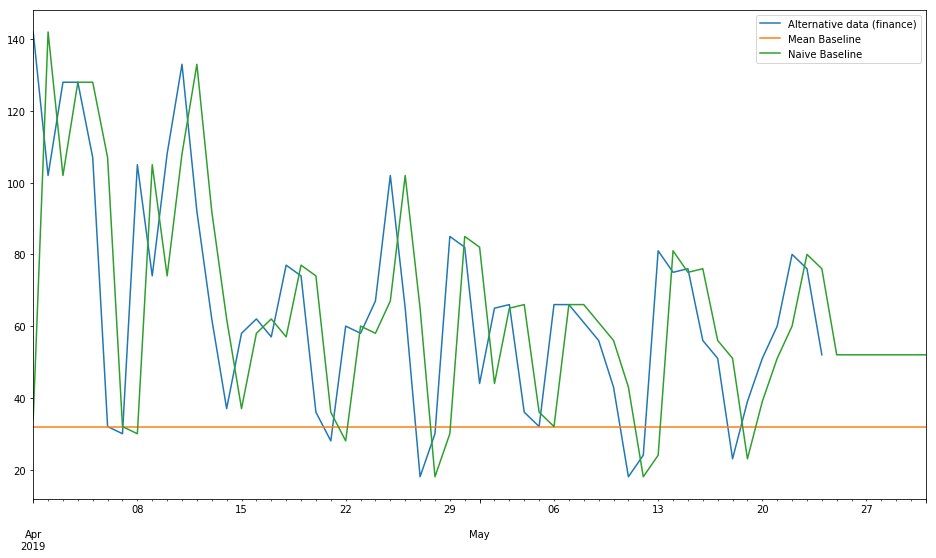

In [11]:
df['2019-04':'2019-05'].plot(figsize=(16,9));

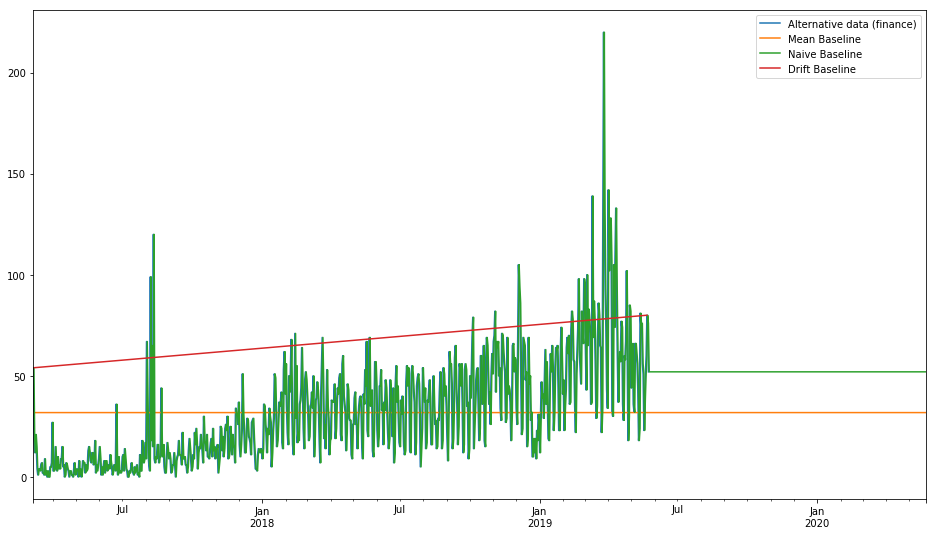

In [12]:
import numpy as np
df['Drift Baseline'] = np.nan
df.loc['2017-03-06', 'Drift Baseline'] = df.loc['2017-03-06', 'Alternative data (finance)']
df.loc['2019-05-22', 'Drift Baseline'] = df.loc['2019-05-22', 'Alternative data (finance)']
df['Drift Baseline'] = df['Drift Baseline'].interpolate(limit_area='inside')
df.plot(figsize=(16,9));

In [0]:
df = df.reset_index().rename(columns={'index': 'ds', 'Alternative data (finance)': 'y'})

In [14]:
from fbprophet import Prophet
m = Prophet()
m.fit(df)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [15]:
future = m.make_future_dataframe(periods=365)
future.tail()

,ds
1535,2021-05-19
1536,2021-05-20
1537,2021-05-21
1538,2021-05-22
1539,2021-05-23


In [0]:
forecast = m.predict(future)

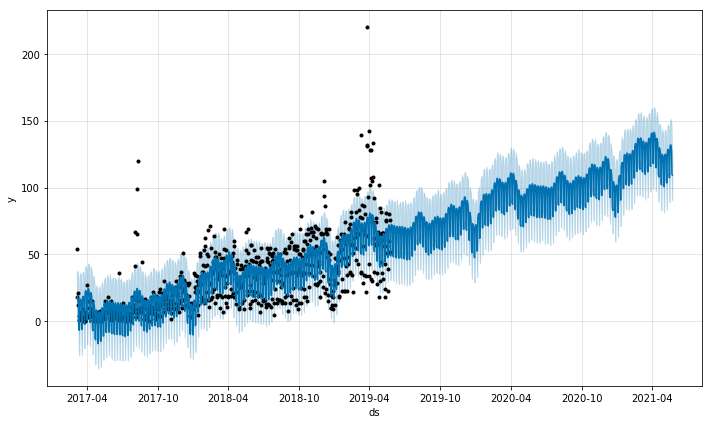

In [17]:
fig1 = m.plot(forecast)

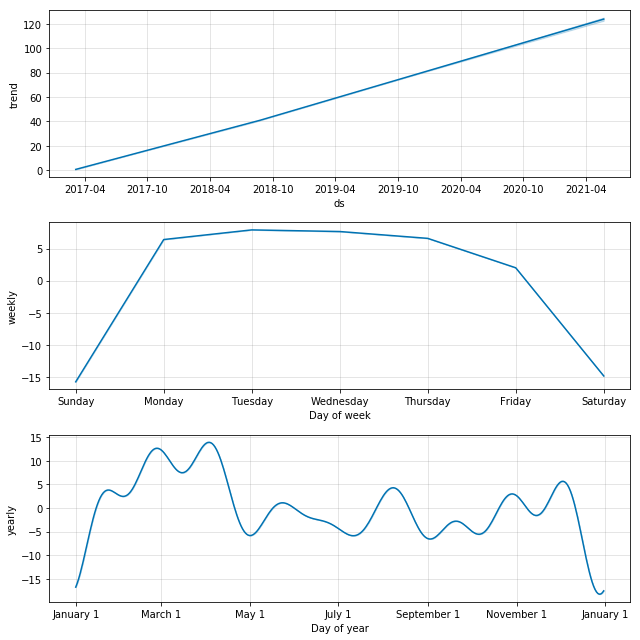

In [18]:
fig2 = m.plot_components(forecast)